In [19]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(context='notebook',palette='Set3', style='darkgrid')
%matplotlib inline

from classes.ClusterModel import ClusterModel

import pickle

In [2]:
df_clientes = pd.read_csv("data/processados/clientes.csv")

In [3]:
df_clientes.columns

Index(['Id', 'Idade', 'EstadoCivil', 'BillingCity', 'ScoreNivelConhecimento',
       'PerfilInvestidor', 'RendaMensal', 'ValorPatrimonio', 'ScoreObjetivos',
       'ScoreSituacaoFinanceira', 'ScoreRisco', 'P_investidor',
       'b_renda_mensal', 'b_idade', 'tempo_dinheiro_inves', 'resgate_dia',
       'inves_renda_mensal', 'possivel_renda_investida_mes'],
      dtype='object')

In [4]:
df_ml = df_clientes[['EstadoCivil', 'ScoreNivelConhecimento', 'ScoreObjetivos', 
                    'ScoreSituacaoFinanceira', 'P_investidor', 'b_renda_mensal',
                    'b_idade', 'tempo_dinheiro_inves', 'resgate_dia', 'inves_renda_mensal',
                    'possivel_renda_investida_mes']]

In [5]:
df_ml.head()

,EstadoCivil,ScoreNivelConhecimento,ScoreObjetivos,ScoreSituacaoFinanceira,P_investidor,b_renda_mensal,b_idade,tempo_dinheiro_inves,resgate_dia,inves_renda_mensal,possivel_renda_investida_mes
0,M,1.0,2.0,1.0,conservador,"(-50.0, 10000.0]","(16.921, 32.8]",1_ano,30,10,130.0
1,S,1.0,3.0,1.0,conservador,"(-50.0, 10000.0]","(16.921, 32.8]",inder,0,20,100.0
2,C,1.0,1.0,1.0,conservador,"(-50.0, 10000.0]","(16.921, 32.8]",inder,100,10,310.0
3,S,1.0,5.0,2.0,moderado,"(-50.0, 10000.0]","(32.8, 48.6]",1_a_5_anos,0,50,1000.0
4,D,2.0,2.0,2.0,conservador,"(-50.0, 10000.0]","(32.8, 48.6]",1_a_5_anos,50,10,600.0


In [6]:
df_ml.dropna(inplace=True)

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_ml.isnull().sum()

EstadoCivil                     0
ScoreNivelConhecimento          0
ScoreObjetivos                  0
ScoreSituacaoFinanceira         0
P_investidor                    0
b_renda_mensal                  0
b_idade                         0
tempo_dinheiro_inves            0
resgate_dia                     0
inves_renda_mensal              0
possivel_renda_investida_mes    0
dtype: int64

In [8]:
cluster_model = ClusterModel(df_ml)

In [9]:
cluster_model.get_pca_ratio()

array([0.17992252, 0.09362457, 0.06501921, 0.0521731 , 0.04929747,
       0.04543931, 0.04348399, 0.04213695, 0.04118423, 0.04069204,
       0.03726561, 0.03636315, 0.03568194, 0.03499351, 0.03459499,
       0.03366571, 0.02888312, 0.02731015, 0.02390962, 0.02301663])

In [10]:
cluster_model.get_pca_values()

array([[-2.37678833, -0.20013605, -0.04877375, ...,  0.05795864,
        -0.46577186, -0.49780638],
       [-2.12673564,  1.41578476,  0.55942513, ..., -1.34189281,
        -0.07065414, -0.77331729],
       [-3.03329334, -0.96356148,  1.38075589, ...,  1.17344075,
        -0.92016321,  0.26241337],
       ...,
       [-0.48731882, -1.42145898,  0.12015153, ...,  0.51731654,
         0.46031054,  1.12448163],
       [-0.74673149,  0.62279045,  2.21103588, ..., -1.25540956,
         1.34345211,  0.57782817],
       [ 3.62148701,  4.12678212,  2.14967669, ...,  0.99141239,
         0.66837585, -0.84169893]])

In [11]:
clusters, model = cluster_model.kmeans_cluster()

In [22]:
pickle.dump(model, open(f'models/kmeans_clientes_{dt.datetime.now()}.pkl','wb'))

In [12]:
clusters[0].head()

,EstadoCivil,ScoreNivelConhecimento,ScoreObjetivos,ScoreSituacaoFinanceira,P_investidor,b_renda_mensal,b_idade,tempo_dinheiro_inves,resgate_dia,inves_renda_mensal,possivel_renda_investida_mes,cluster
0,M,1.0,2.0,1.0,conservador,"(-50.0, 10000.0]","(16.921, 32.8]",1_ano,30,10,130.0,2
1,S,1.0,3.0,1.0,conservador,"(-50.0, 10000.0]","(16.921, 32.8]",inder,0,20,100.0,2
2,C,1.0,1.0,1.0,conservador,"(-50.0, 10000.0]","(16.921, 32.8]",inder,100,10,310.0,2
3,S,1.0,5.0,2.0,moderado,"(-50.0, 10000.0]","(32.8, 48.6]",1_a_5_anos,0,50,1000.0,1
4,D,2.0,2.0,2.0,conservador,"(-50.0, 10000.0]","(32.8, 48.6]",1_a_5_anos,50,10,600.0,0


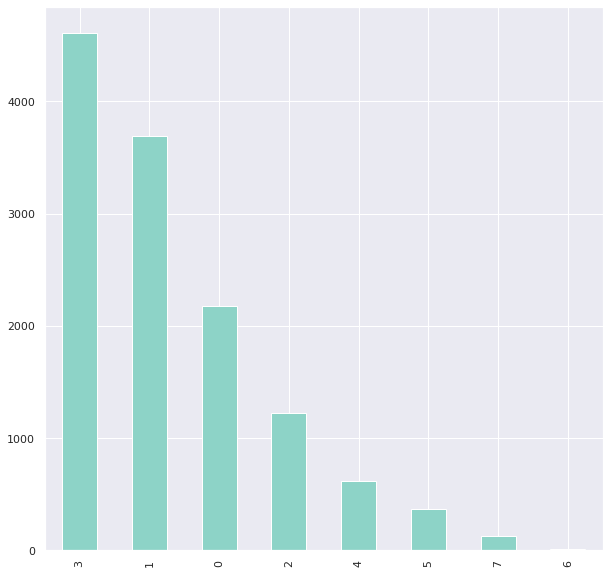

In [50]:
clust = clusters[1]
plt.figure(figsize=(10,10))
clust['cluster'].value_counts().plot(kind='bar')

/home/vinicius/.pyenv/versions/3.7.4/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


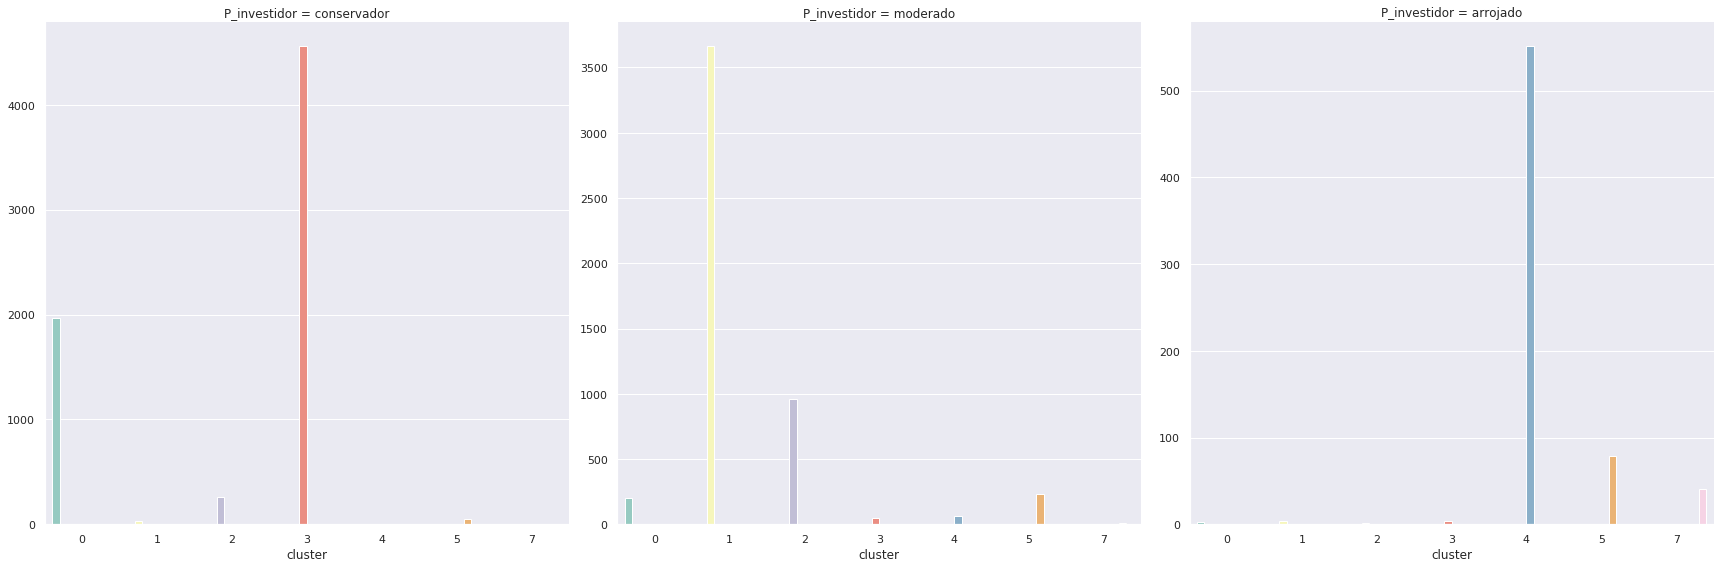

In [51]:
g = sns.FacetGrid(clust, col="P_investidor", height=8, sharey=False, aspect=1)
g = g.map(sns.countplot, "cluster", hue="cluster", palette='Set3',data=clust)

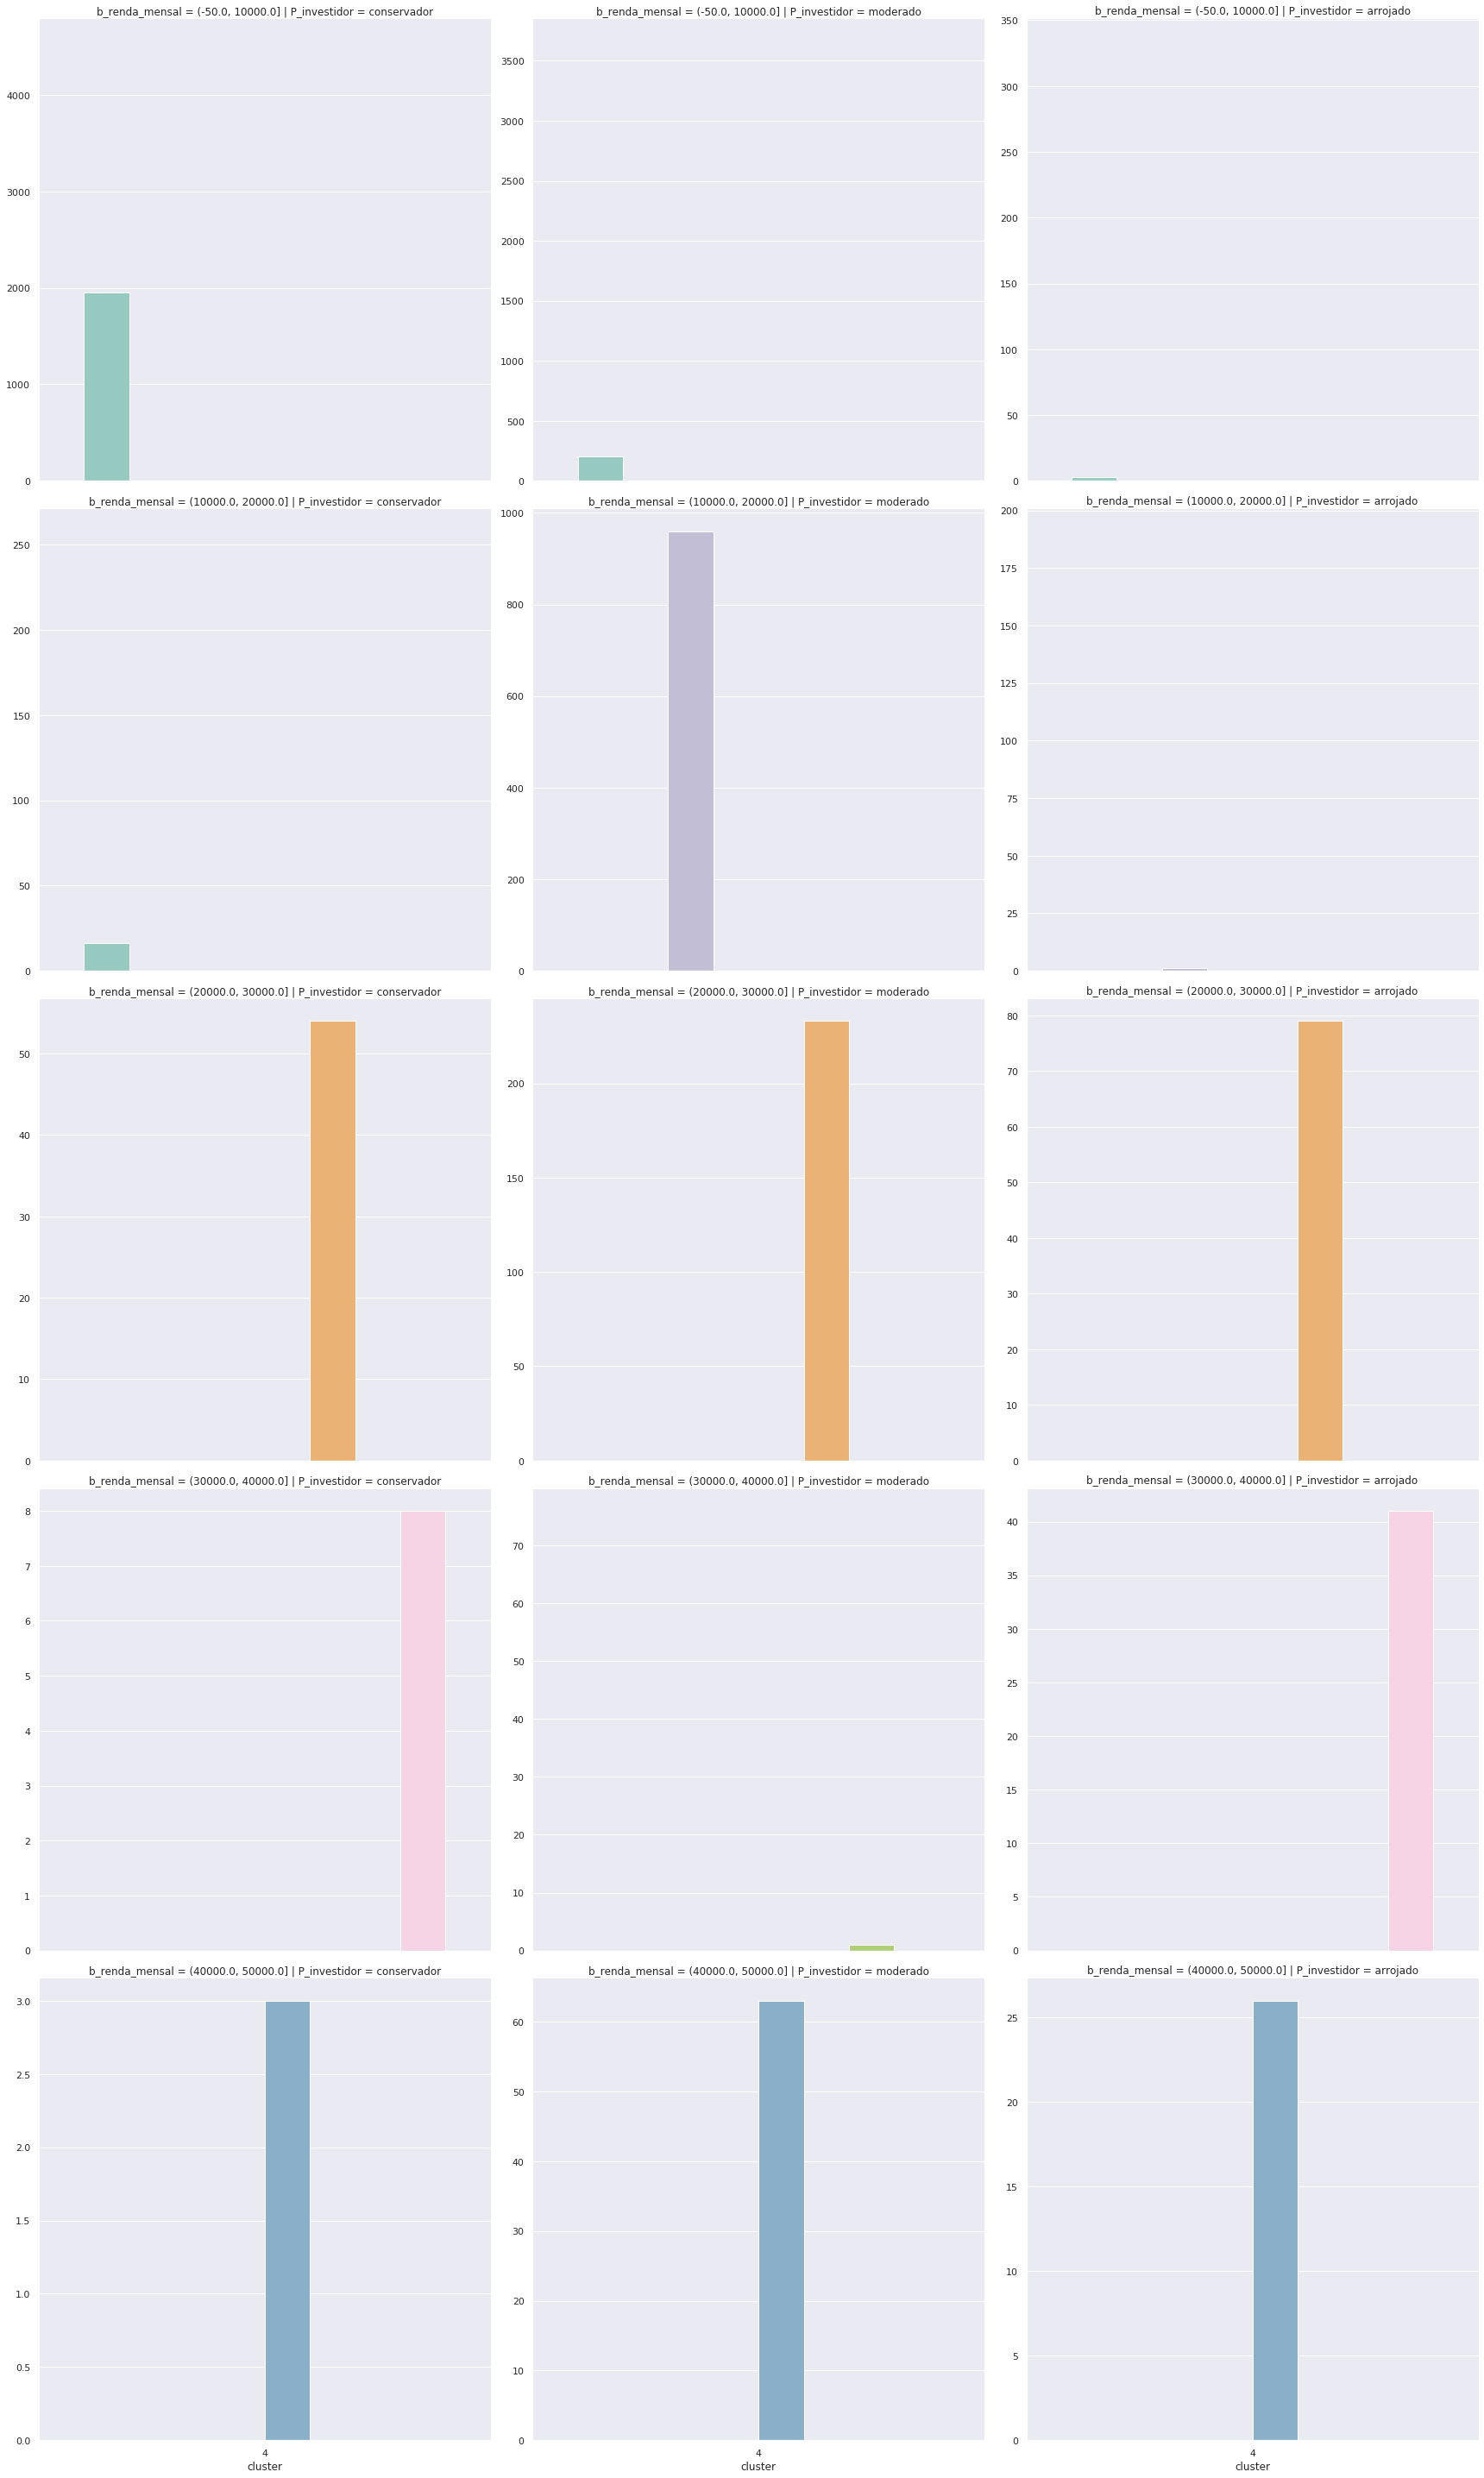

In [52]:
g = sns.FacetGrid(clust, col="P_investidor", row='b_renda_mensal', height=8, sharey=False, aspect=1)
g = g.map(sns.countplot, "cluster", hue="cluster", palette='Set3',data=clust)

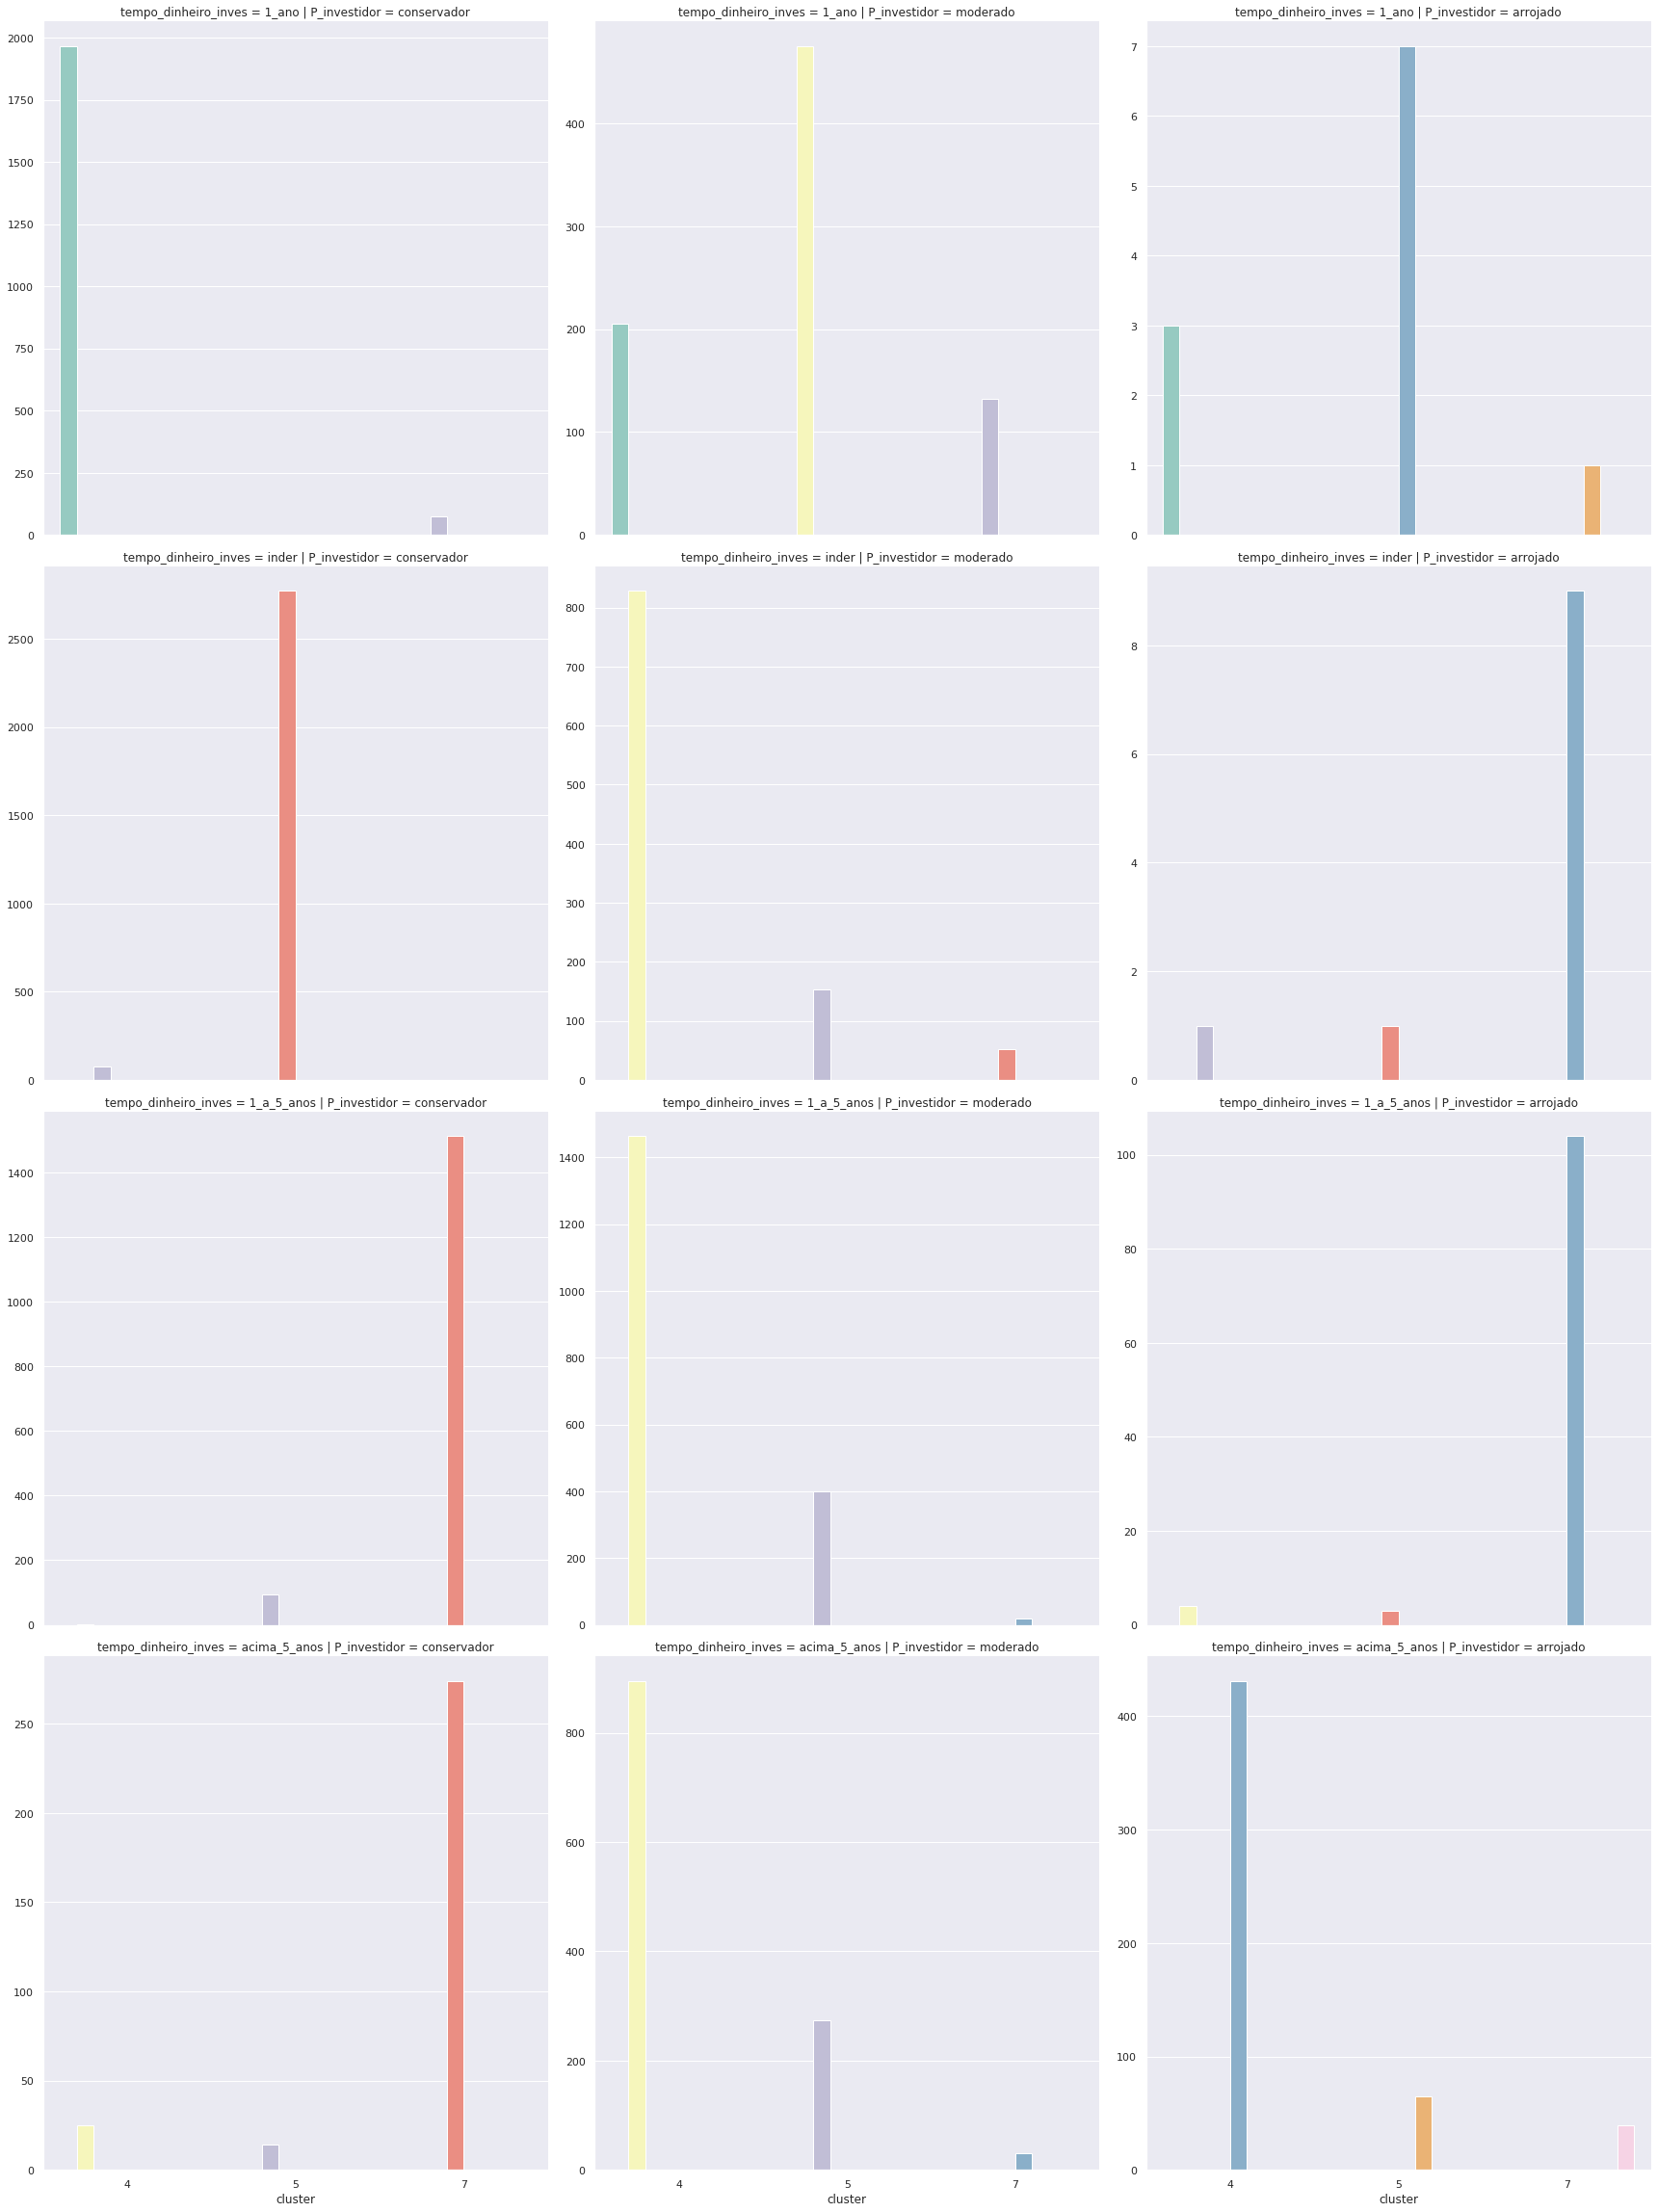

In [45]:
g = sns.FacetGrid(clust, col="P_investidor", row='tempo_dinheiro_inves', height=8, sharey=False, aspect=1)
g = g.map(sns.countplot, "cluster", hue="cluster", palette='Set3',data=clust)

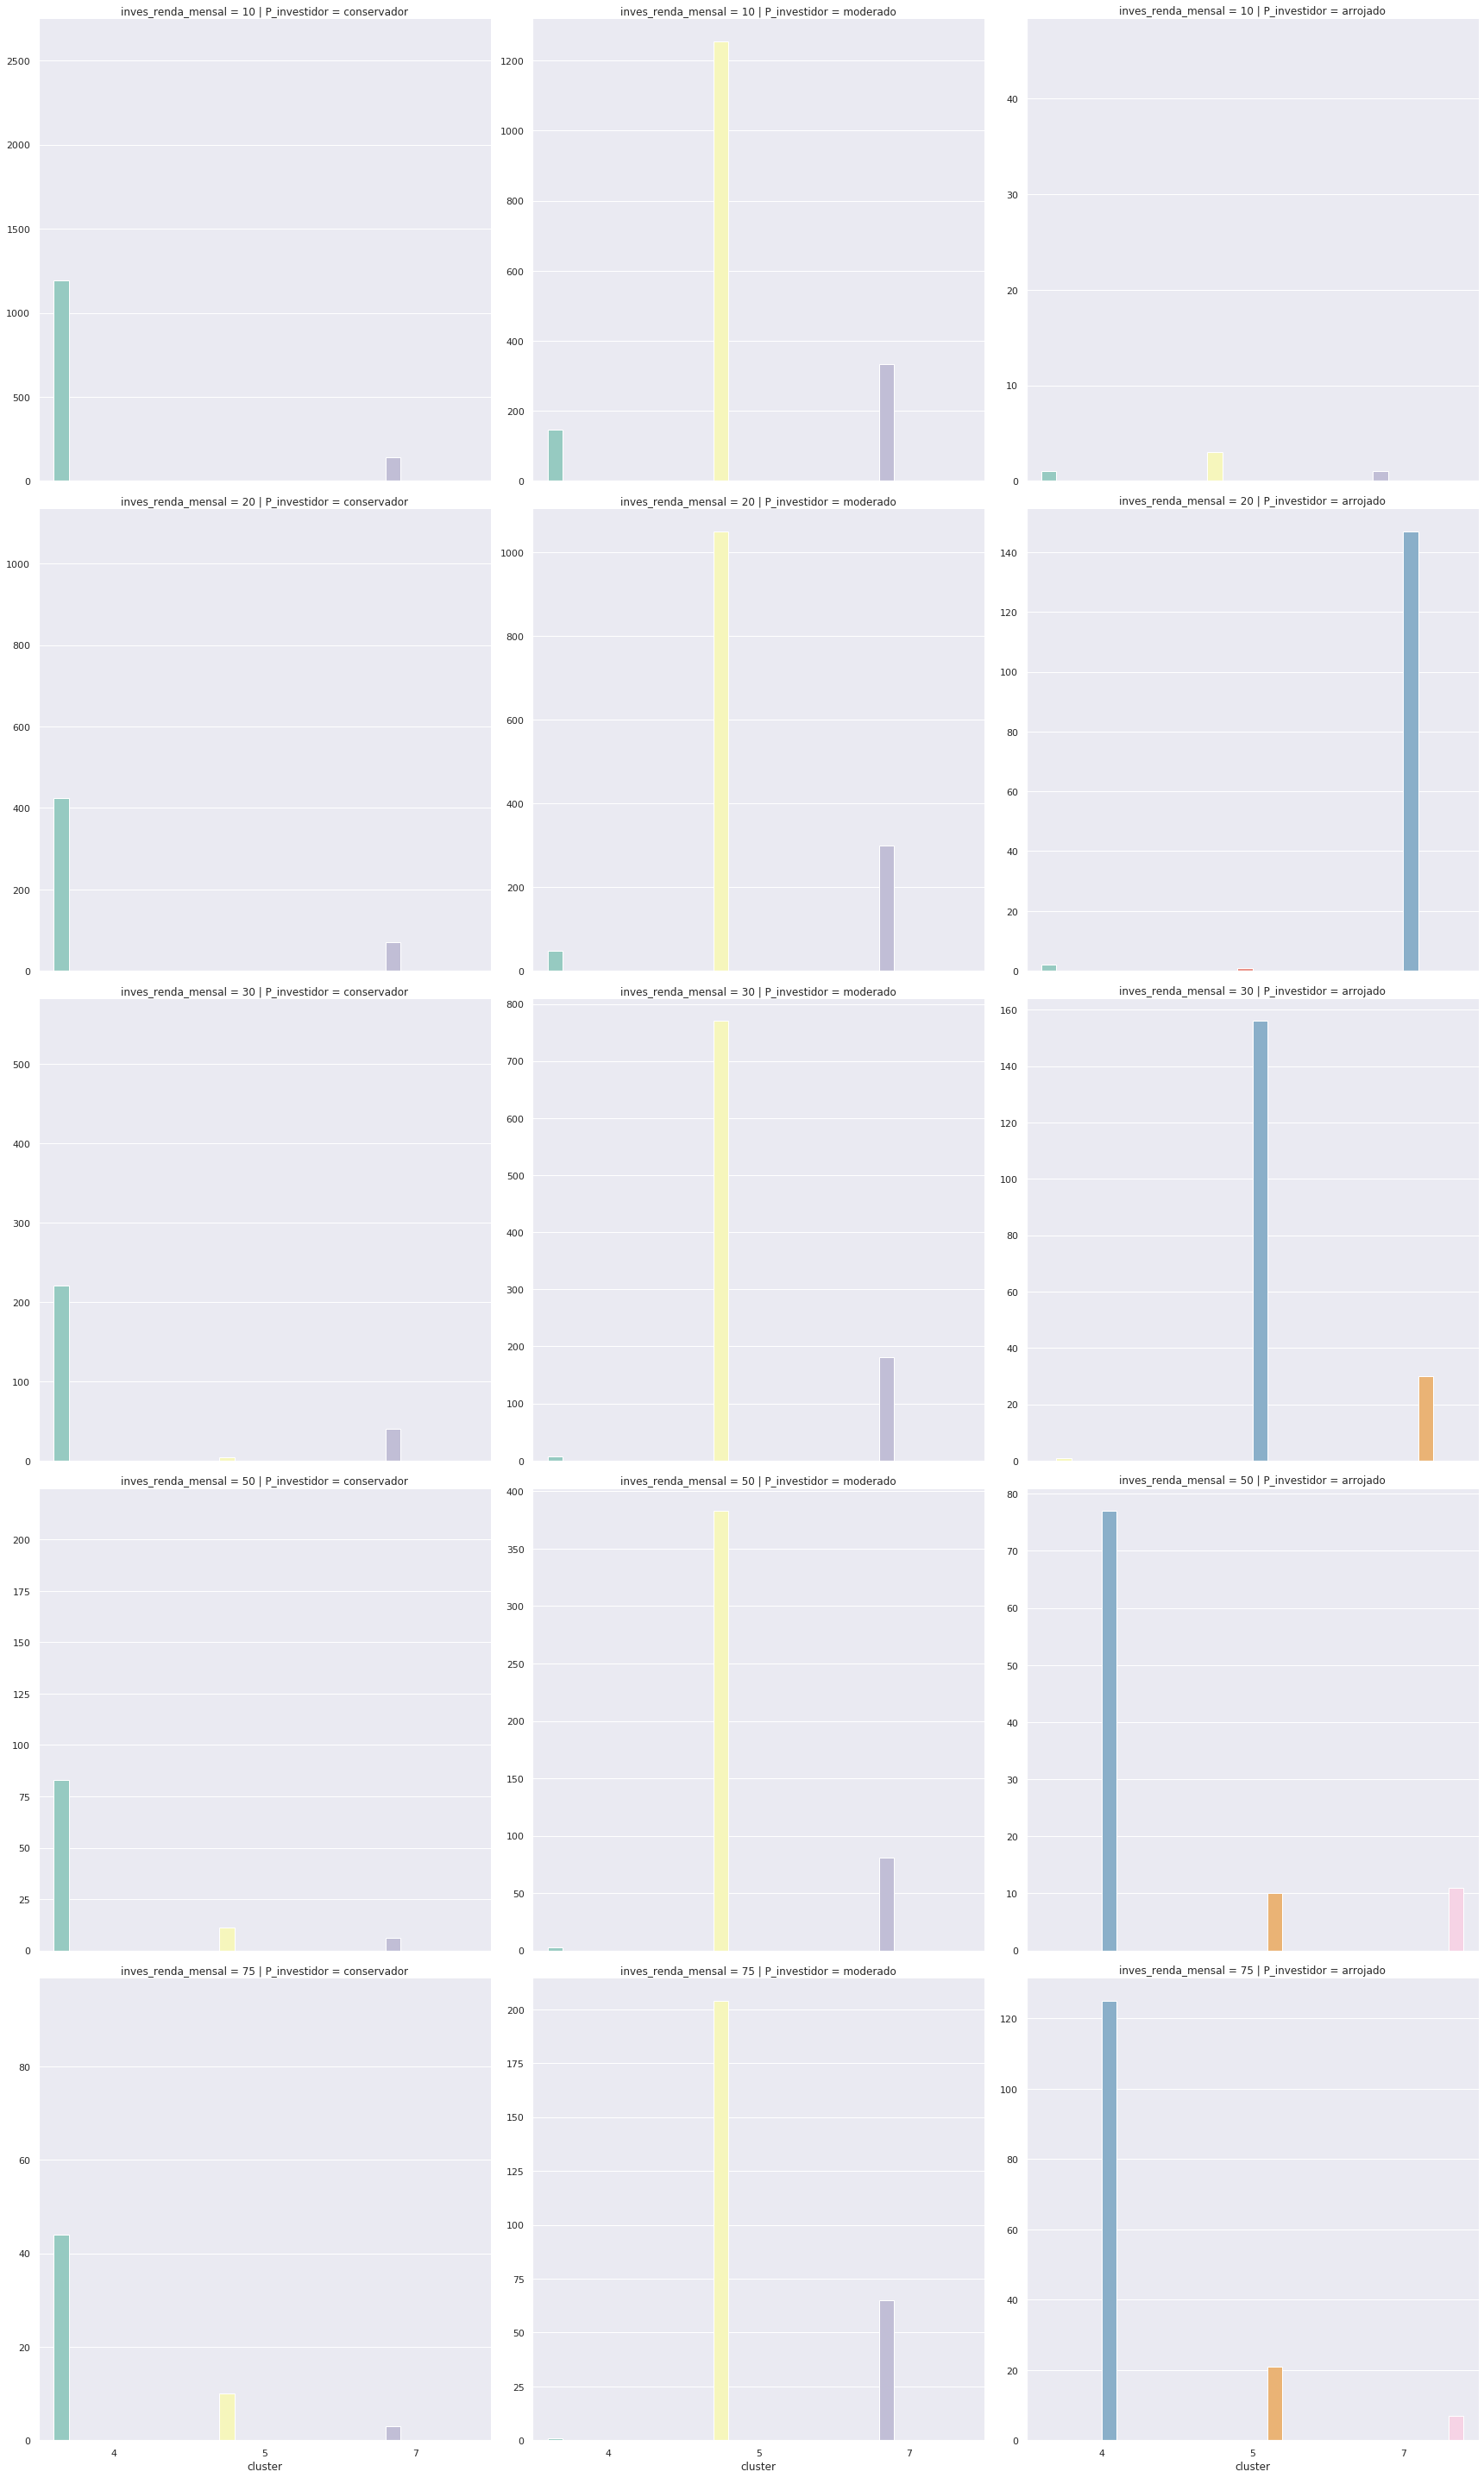

In [46]:
g = sns.FacetGrid(clust, col="P_investidor", row='inves_renda_mensal', sharey=False, height=8, aspect=1)
g = g.map(sns.countplot, "cluster", hue="cluster", palette='Set3',data=clust)